# Explore here

In [82]:
import pandas as pd

df = pd.read_csv('/workspaces/machine-learning-python-template5/data/raw/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [84]:
import matplotlib.pyplot as plt 
import seaborn as sns


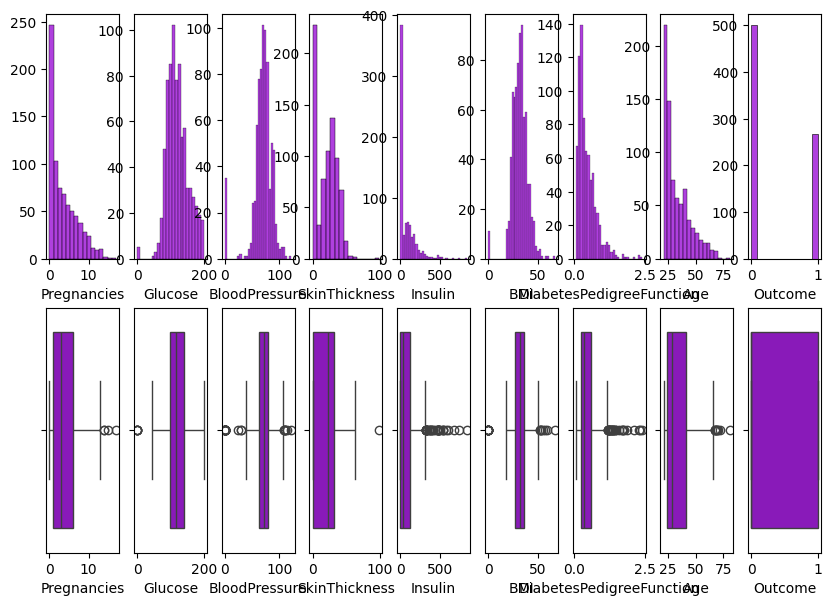

In [85]:
fig, axis = plt.subplots(2, 9, figsize = (10, 7))


x_data = []
for i in df.columns:
    x_data.append(i)

for i, col in enumerate(x_data):
    sns.histplot(ax=axis[0, i], data=df, x=col, color='darkviolet').set(ylabel=None)
    sns.boxplot(ax=axis[1, i], data=df, x=col, color='darkviolet')




plt.show()

The variables with the most outliers are insulin, DiabetesPedigreeFunction and BMI

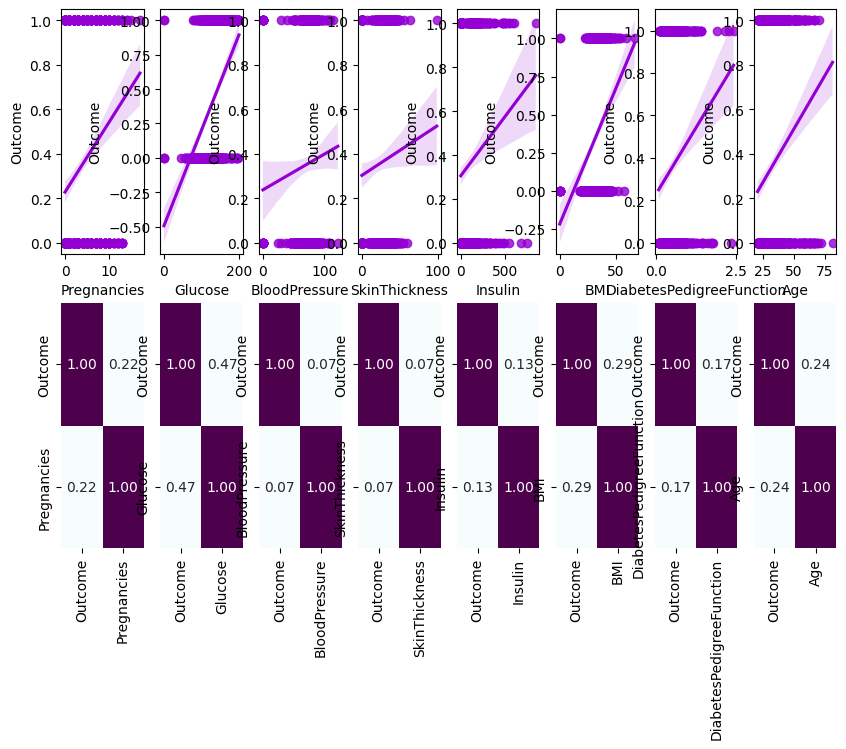

In [114]:
fig, axis = plt.subplots(2, 8, figsize = (10, 7))


df2 = df.drop('Outcome', axis=1)
x_data = []
for i in df2.columns:
    x_data.append(i)
for i, col in enumerate(x_data):
    sns.regplot(ax = axis[0, i], data = df, x = col, y = 'Outcome', color = 'darkviolet')
    sns.heatmap(df[["Outcome", col]].corr(), annot = True, fmt = ".2f", ax = axis[1, i], cbar = False, cmap="BuPu")




plt.show()

The strongest relationship is between the glucose and the diabetes. This is followed by the BMI, the age and the pregnancies. 

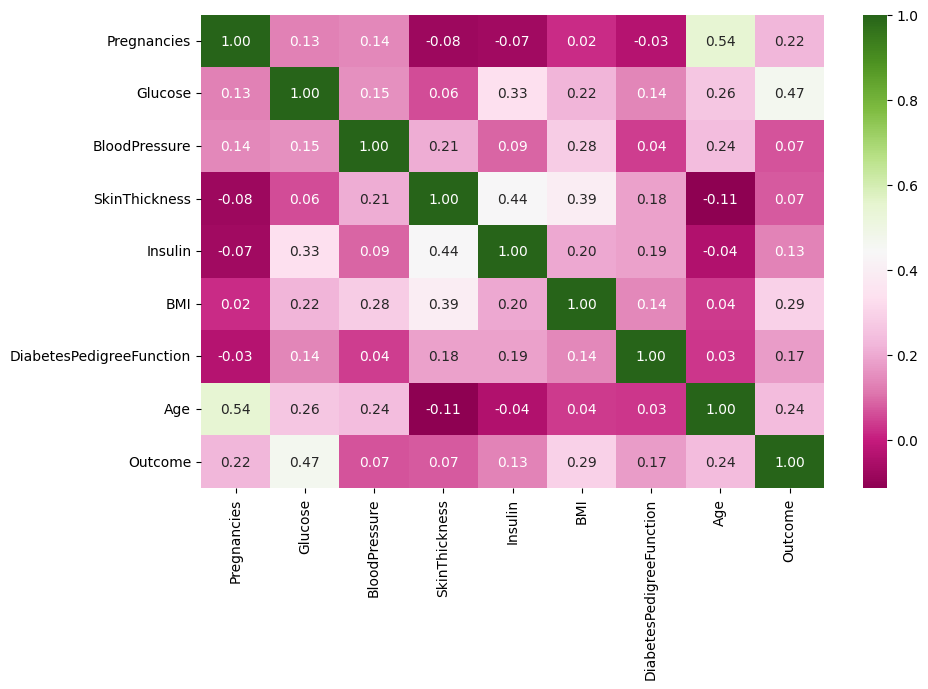

In [113]:
fig, axis = plt.subplots(figsize = (10, 7))

x_data = []
for i in df.columns:
    x_data.append(i)
sns.heatmap(df[x_data].corr(), annot = True, fmt = ".2f", cmap="PiYG")

plt.tight_layout()

plt.show()

Here we can see again, that the most related variables are glucose, BMI and age. There is also a very strong relationship between pregnancies and age, that we can study further. 

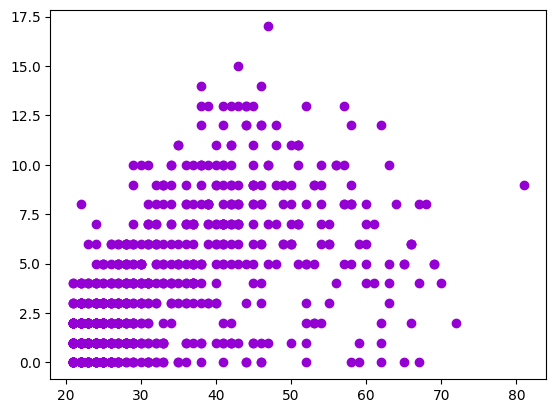

In [88]:
plt.scatter(x = df['Age'], y = df['Pregnancies'],color = 'darkviolet' )
plt.show()

In [98]:
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.model_selection import train_test_split

x_data = []
for i in df.columns:
    x_data.append(i)

X = df.drop("Outcome", axis = 1)
y = df["Outcome"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 77)

X_train.to_csv("/workspaces/machine-learning-python-template5/data/raw/diabetes_train_X.csv", index=False)
with open("/workspaces/machine-learning-python-template5/data/raw/bdiabetes_train_y.txt", "w") as f:
    f.write(y_train.to_string(index=False))
X_test.to_csv("/workspaces/machine-learning-python-template5/data/raw/diabetes_test_X.csv", index=False)
with open("/workspaces/machine-learning-python-template5/data/raw/diabetes_test_y.txt", "w") as f:
    f.write(y_test.to_string(index=False))
X_train.head()

X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
155,7,152,88,44,0,50.0,0.337,36
19,1,115,70,30,96,34.6,0.529,32
658,11,127,106,0,0,39.0,0.190,51
450,1,82,64,13,95,21.2,0.415,23
5,5,116,74,0,0,25.6,0.201,30


In [99]:
from sklearn.feature_selection import f_classif, SelectKBest

# Con un valor de k = 5 queremos decir implícitamente que queremos eliminar 2 características del conjunto de datos
selection_model = SelectKBest(f_classif, k= int(len(X_train.columns) * 0.7))
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age
0,7.0,152.0,50.0,0.337,36.0
1,1.0,115.0,34.6,0.529,32.0
2,11.0,127.0,39.0,0.190,51.0
3,1.0,82.0,21.2,0.415,23.0
4,5.0,116.0,25.6,0.201,30.0


This solution to the best selection process is good because it is what he had seen already.

In [100]:
X_train_sel["Outcome"] = list(y_train)


<Axes: >

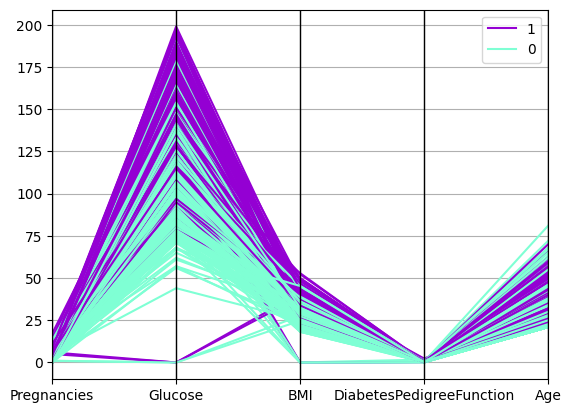

In [101]:
total_data = X_train_sel
total_data["Outcome"] = X_train_sel["Outcome"]

pd.plotting.parallel_coordinates(total_data, "Outcome", color = ("darkviolet", "aquamarine"))

In [102]:
TotalTree = X_train_sel.drop('Outcome', axis=1)

In [103]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 42)
model.fit(TotalTree, X_train_sel['Outcome'])

DecisionTreeClassifier(random_state=42)

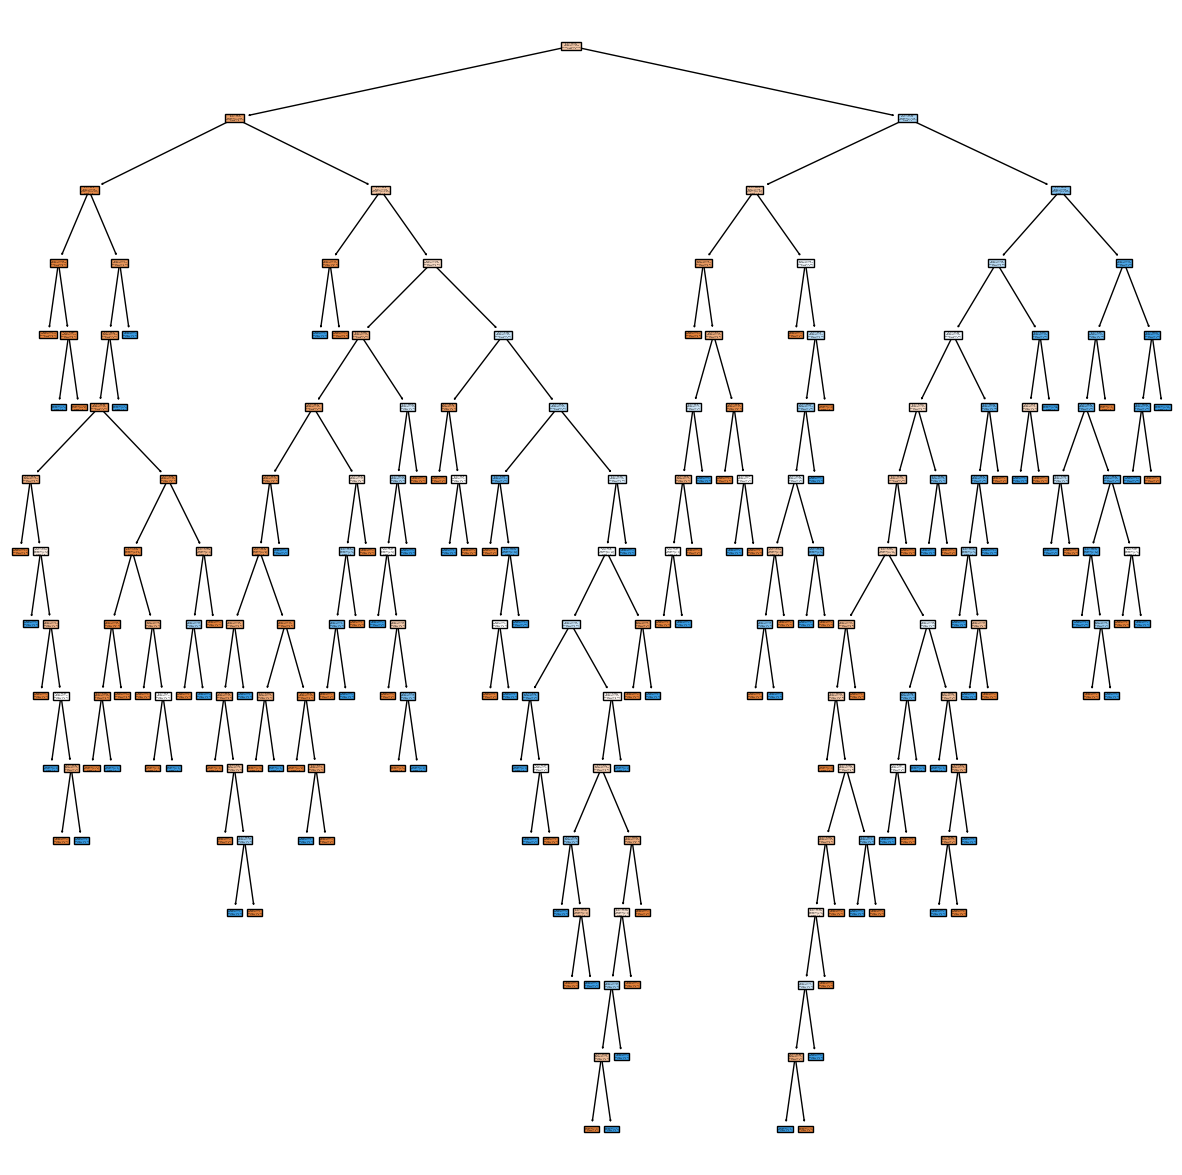

In [104]:
from sklearn import tree

fig = plt.figure(figsize=(15,15))


tree.plot_tree(model, feature_names = X_train_sel['Outcome'], class_names = ["0", "1"], filled = True)

plt.show()

In [116]:
y_pred = model.predict(X_test_sel)
y_pred

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1])

In [106]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7012987012987013

In [107]:
from pickle import dump

dump(model, open("decision_tree_classifier_default_50.sav", "wb"))
